In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\FlipRobo\Micro Credit Defaulter 15-04\Micro Credit Project\Data file.csv")

# Data Understanding

In [3]:
#Visualizing the dataset 
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Here we note that, there are no null values present in the data set.

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
df.columns #Calling all the column names of the dataset

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

- label	: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn	: mobile number of user
- aon	: age on cellular network in days
- daily_decr30	: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90	: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30	: Average main account balance over last 30 days
- rental90	: Average main account balance over last 90 days
- last_rech_date_ma	: Number of days till last recharge of main account
- last_rech_date_da	: Number of days till last recharge of data account
- last_rech_amt_ma	: Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30	: Number of times main account got recharged in last 30 days
- fr_ma_rech30	: Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30	: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30	: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30	: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90	: Number of times main account got recharged in last 90 days
- fr_ma_rech90	: Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90	: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90	: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90	: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30	: Number of times data account got recharged in last 30 days
- fr_da_rech30	: Frequency of data account recharged in last 30 days
- cnt_da_rech90	: Number of times data account got recharged in last 90 days
- fr_da_rech90	: Frequency of data account recharged in last 90 days
- cnt_loans30	: Number of loans taken by user in last 30 days
- amnt_loans30	: Total amount of loans taken by user in last 30 days
- maxamnt_loans30	: maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30	: Median of amounts of loan taken by the user in last 30 days
- cnt_loans90	: Number of loans taken by user in last 90 days
- amnt_loans90	: Total amount of loans taken by user in last 90 days
- maxamnt_loans90	: maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90	: Median of amounts of loan taken by the user in last 90 days
- payback30	: Average payback time in days over last 30 days
- payback90	: Average payback time in days over last 90 days
- pcircle	: telecom circle
- pdate	: date

In [7]:
df.shape #Looking into the shape of the dataset

(209593, 37)

<AxesSubplot:>

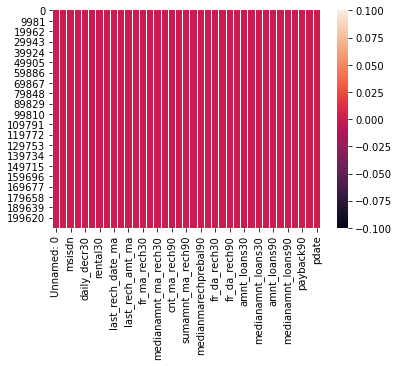

In [8]:
sns.heatmap(df.isnull(), annot=False) #Visualization of null values

# Exploratory Data Analysis

We drop the unnamed column as it is just present as an index

In [9]:
df.drop(columns='Unnamed: 0',inplace=True)

We know that there are no null values present in the dataset. Let us treat the data for object type columns which are 'pcircle' ,'pdate' and 'msisdn'.

In [10]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

We see that there is only one unique value for the column and hence does not provide much value to the machine learning. We shall drop the column.  

In [11]:
df.drop(columns='pcircle',inplace=True)

We know that the data is collected from the year 2006, also the date feature does not seem important for the prediction model of micro credit and hence we shall drop this column too. 

In [12]:
df.drop(columns='pdate',inplace=True)

Next column we look into is the 'msisdn' column, which is simply the mobile number of the client supporting the data. We also find that there are more than 1 row of data for the same contact number. Also this contact information provides us with value for the model, we treat it for compatibility before moving forward with the model.

In [13]:
le = LabelEncoder()
df['msisdn'] = le.fit_transform(df['msisdn'])

Now that the all object type columns present in the dataset has been treated, we can for a statistic view of the dataset

In [14]:
pd.set_option("display.max_columns",None)
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We see that there are a lot of outliers in the dataset, let us treat for them using zscore method.

In [15]:
z = np.abs(zscore(df))

We take a zscore threshold of range(-6,6)

In [16]:
df2 = df[(z<6).all(axis=1)]

In [17]:
print("Percentage loss of data:\t", ((df.shape[0]-df2.shape[0])*100)/df.shape[0], "%")

Percentage loss of data:	 7.48450568482726 %


Now that the outliers are dealt with, we do feature selection using filter method. Hence, we start with correlation matrix of the dataset

<AxesSubplot:>

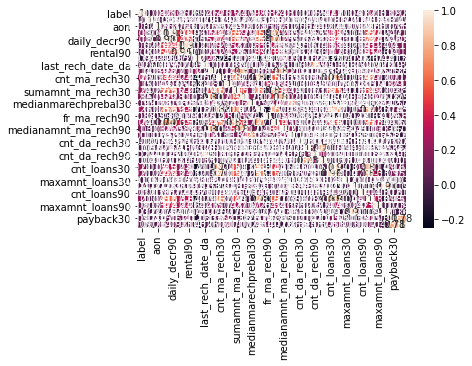

In [36]:
sns.heatmap(df2.corr(), annot=True) #Correlation matrix

In [19]:
df2.corr()['label'].sort_values() #Correlation matrix wrt to target variable

last_rech_date_ma      -0.094410
maxamnt_loans30        -0.000610
fr_da_rech90            0.000414
fr_da_rech30            0.000552
msisdn                  0.001355
cnt_da_rech30           0.002688
cnt_da_rech90           0.023704
last_rech_date_da       0.026469
medianamnt_loans90      0.032321
cnt_loans90             0.032412
medianamnt_loans30      0.041273
rental30                0.061570
rental90                0.080478
maxamnt_loans90         0.081262
aon                     0.081729
fr_ma_rech90            0.088360
payback90               0.089661
payback30               0.091757
medianmarechprebal30    0.098729
medianmarechprebal90    0.100233
medianamnt_ma_rech90    0.133294
last_rech_amt_ma        0.143221
fr_ma_rech30            0.147609
medianamnt_ma_rech30    0.152548
daily_decr90            0.181288
daily_decr30            0.182122
cnt_loans30             0.206074
amnt_loans30            0.209998
amnt_loans90            0.212642
sumamnt_ma_rech30       0.235307
sumamnt_ma

We see that there are few columns that produce a very small correlation to the target variable, while some produce inverse correlation. However, we will use all the features present in the dataset. 

Before we move forward, let us first split the dataset into target and feature variables

In [20]:
x = df2.drop(columns='label')
y = df2['label']

Now the next step is to check for skewness in the feature variables

In [21]:
#Treating for skewness using sqrt method
for i in x.columns:
    x[i] = np.sqrt(x[i])

The next step is the scaling of data making it fit for modelling

In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Best Random State

In [23]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.8767211593007065
Random State: 	 61


Now since we got the best random state for data modelling, we create the test train models

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=maxRS)

# Model Predictions

Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 87.67211593007065
[[  329  4554]
 [  227 33672]]
              precision    recall  f1-score   support

           0       0.59      0.07      0.12      4883
           1       0.88      0.99      0.93     33899

    accuracy                           0.88     38782
   macro avg       0.74      0.53      0.53     38782
weighted avg       0.84      0.88      0.83     38782



K-Nearest Neighbors

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 87.00428033623847
[[ 1548  3335]
 [ 1705 32194]]
              precision    recall  f1-score   support

           0       0.48      0.32      0.38      4883
           1       0.91      0.95      0.93     33899

    accuracy                           0.87     38782
   macro avg       0.69      0.63      0.65     38782
weighted avg       0.85      0.87      0.86     38782



Decision Tree Classifier

In [27]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 86.21525449951008
[[ 2396  2487]
 [ 2859 31040]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      4883
           1       0.93      0.92      0.92     33899

    accuracy                           0.86     38782
   macro avg       0.69      0.70      0.70     38782
weighted avg       0.87      0.86      0.86     38782



Random Forest Classifier

In [28]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 91.25367438502397
[[ 2157  2726]
 [  666 33233]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      4883
           1       0.92      0.98      0.95     33899

    accuracy                           0.91     38782
   macro avg       0.84      0.71      0.76     38782
weighted avg       0.90      0.91      0.90     38782



XGBoost Classifier

In [30]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[19:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 	 91.44448455469032
[[ 2231  2652]
 [  666 33233]]
              precision    recall  f1-score   support

           0       0.77      0.46      0.57      4883
           1       0.93      0.98      0.95     33899

    accuracy                           0.91     38782
   macro avg       0.85      0.72      0.76     38782
weighted avg       0.91      0.91      0.90     38782



We see that the XGBoost gives the most efficiency of 91.44%

# Cross Validation

In [31]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.8753210344598766


In [32]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.871442874214023


In [33]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr3.mean())

Cross validation score of Decision Tree is: 	 0.8649861256886915


In [34]:
scr4 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr4.mean())

Cross validation score of Random Forest is: 	 0.9128598392411185


In [35]:
scr5 = cross_val_score(xgb, x, y, cv=5)
print("Cross validation score of XGB is: \t", scr5.mean())

[19:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

We can see that XGBoost performs the best among others

# Hyper Parameter Tuning

In [39]:
gcv = GridSearchCV

In [41]:
gcv.get_params(xgb)

{'objective': 'binary:logistic', 'use_label_encoder': True}

In [45]:
params = {'objective': ['binary:logistic','multi:softmax','multi:softprob'],
              'use_label_encoder': [True,False],
              'seed':[0,2,4,6]}

In [46]:
gcv = GridSearchCV(xgb, params, scoring='accuracy', cv=5)

In [47]:
gcv.fit(x_train,y_train)

[21:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [48]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'objective': 'binary:logistic', 'seed': 0, 'use_label_encoder': True}
Accuracy : 0.9143137105987243


In [49]:
gcv_pred = gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9144448455469032

The best estimator gives the accuracy of 91.44% which is not better than the original 91.44% and hence we shall save the default

# ROC AUC Plot

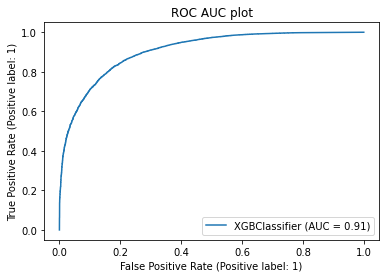

In [50]:
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of 91% is very good

# Saving the best model

In [53]:
joblib.dump(gcv.best_estimator_,"micro_credit.pkl")

['micro_credit.pkl']